In [2]:
import astropy.units as u
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from tdsat_telescope import load_qe, load_reflectivity, load_redfilter, apply_filters
from duet_filters import optimize_filter, make_red_filter
from apply_transmission import apply_trans
from zodi import load_airglow, load_zodi
import astropy.units as u

Optics reflectivity loader
Input file input_data/al_mgf2_mirror_coatings.csv


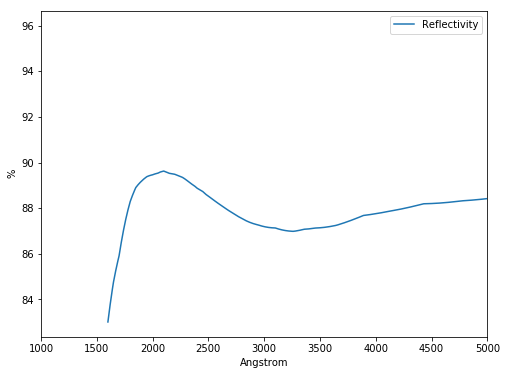

In [36]:
ref_wave, reflectivity = load_reflectivity(diag=True)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()


ax.plot(ref_wave.to(u.AA), reflectivity, label='Reflectivity')
ax.set_xlim([1000, 5000])
ax.set_ylabel('%')
ax.legend()
ax.set_xlabel('Angstrom')

plt.show()



/Users/bwgref/anaconda/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


Average in-band transmission: 0.2627222589743589
Average in-band QE: 0.5953104615384616
Average in-band transmission: 0.592534717948718


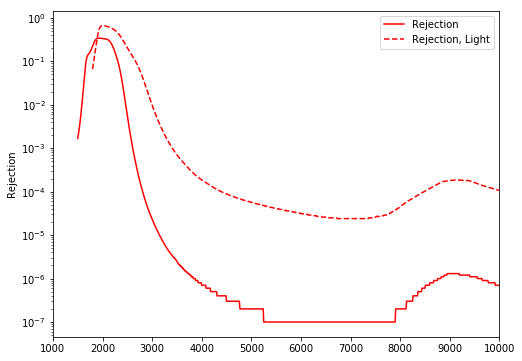

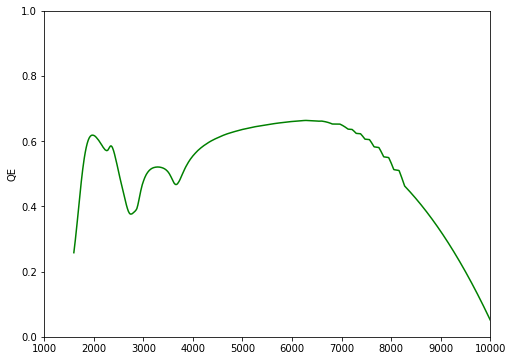

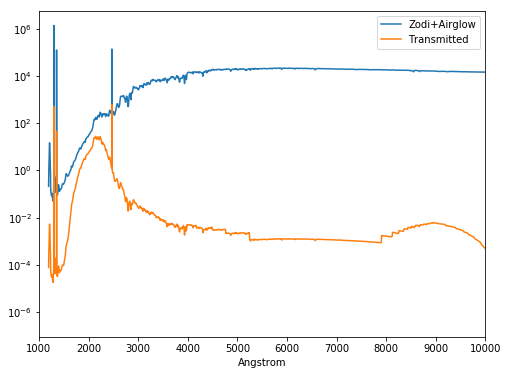

In [28]:
# Band 1
zodi = load_zodi(scale=77)

band_flux = apply_filters(zodi['wavelength'], zodi['flux'], band=1)
low_wave = 193*u.nm
high_wave = 233*u.nm
qe_wave, qe = load_qe(band=1)

red_wave, red_trans = load_redfilter(band=1)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
#print(out_of_band / in_band)


fig = plt.figure(figsize = (8, 6))


ax = fig.subplots()
ax.set_ylabel('Rejection')
ax.plot(red_wave.to(u.AA), red_trans, color = 'red', label='Rejection')
ax.set_xlim([1000, 10000])

ax.set_yscale('Log')



in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))

red_wave, red_trans = load_redfilter(band=1, light=True)
in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))

ax.plot(red_wave.to(u.AA), red_trans, color = 'red',linestyle='--', label='Rejection, Light')

ax.legend()
fig = plt.figure(figsize = (8, 6))


ax2 = fig.subplots()


#ax2 = ax.twinx()

ax2.plot(qe_wave.to(u.AA), qe, color = 'green', label="QE")
ax2.set_ylim([0, 1])
ax2.set_xlim([1000, 10000])




ax2.set_ylabel('QE')




# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc=0)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()


ax.plot(zodi['wavelength'], zodi['flux'], label='Zodi+Airglow')
ax.plot(zodi['wavelength'], band_flux, label='Transmitted')
ax.set_yscale('Log')
ax.set_xlim([1000, 10000])
ax.legend()
ax.set_xlabel('Angstrom')

plt.show()


Average in-band transmission: 0.3575970666666667
Average in-band QE: 0.7426032051282051
Average in-band transmission: 0.5063422564102563


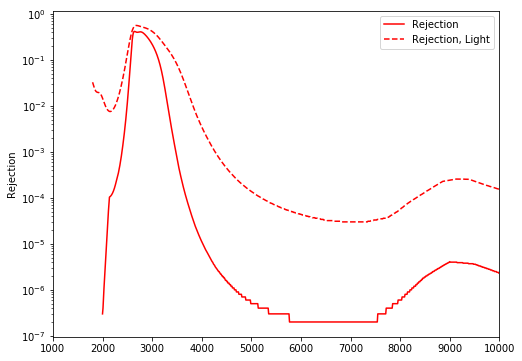

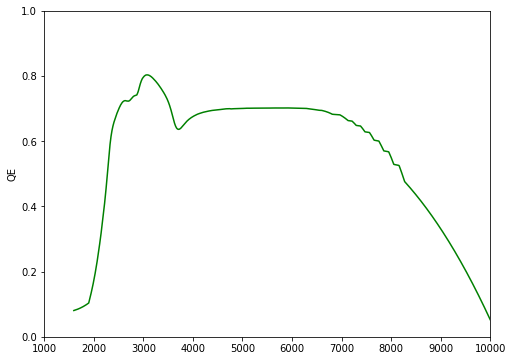

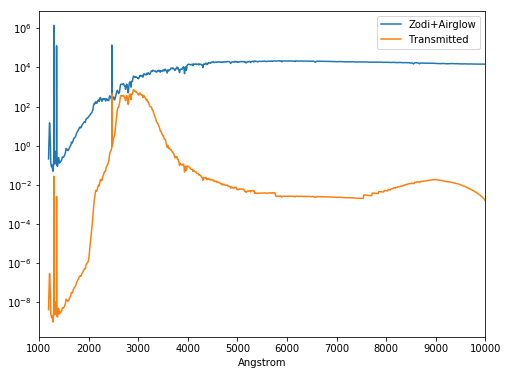

In [29]:

band_flux = apply_filters(zodi['wavelength'], zodi['flux'], band=2)
#ref_wave, reflectivity = load_reflectivity()
low_wave = 260*u.nm
high_wave = 300*u.nm
qe_wave, qe = load_qe(band=2)

red_wave, red_trans = load_redfilter(band=2)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
#print(out_of_band / in_band)


fig = plt.figure(figsize = (8, 6))


ax = fig.subplots()
ax.set_ylabel('Rejection')
ax.plot(red_wave.to(u.AA), red_trans, color = 'red', label='Rejection')
ax.set_xlim([1000, 10000])

ax.set_yscale('Log')



in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))

red_wave, red_trans = load_redfilter(band=2, light=True)
in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))

ax.plot(red_wave.to(u.AA), red_trans, color = 'red',linestyle='--', label='Rejection, Light')

ax.legend()
fig = plt.figure(figsize = (8, 6))


ax2 = fig.subplots()


#ax2 = ax.twinx()

ax2.plot(qe_wave.to(u.AA), qe, color = 'green', label="QE")
ax2.set_ylim([0, 1])
ax2.set_xlim([1000, 10000])




ax2.set_ylabel('QE')


fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()


ax.plot(zodi['wavelength'], zodi['flux'], label='Zodi+Airglow')
ax.plot(zodi['wavelength'], band_flux, label='Transmitted')
ax.set_yscale('Log')
ax.set_xlim([1000, 10000])
ax.legend()
ax.set_xlabel('Angstrom')

# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc=0)


plt.show()

